In [1]:
from dotenv import load_dotenv

_ = load_dotenv(
    override=True,
    verbose=True,
)

In [2]:
from template_langgraph.agents.issue_formatter_agent.agent import IssueFormatterAgent

# Create an instance of the agent
graph = IssueFormatterAgent().create_graph()

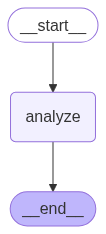

In [3]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
question = "KABUTOにログインできない！パスワードは合ってるはずなのに…若手社員である山田太郎は、Windows 11 を立ち上げ、日課のように自社の業務システムKABUTOのログイン画面を開きます。しかし、そこには、意味をなさない「虚無」という文字だけがただひっそりと表示されていたのです。これは質問でもあり不具合の報告でもあります。岡本太郎さんに本件調査依頼します。"  # noqa: E501

# Stream the agent's response to the question
for event in graph.stream(
    input={
        "messages": [
            {
                "role": "user",
                "content": question,
            }
        ],
    }
):
    print("-" * 20)
    print(f"Event: {event}")

2025-08-14 11:46:56,536 [    INFO] Analyzing issue with state: {'messages': [HumanMessage(content='KABUTOにログインできない！パスワードは合ってるはずなのに…若手社員である山田太郎は、Windows 11 を立ち上げ、日課のように自社の業務システムKABUTOのログイン画面を開きます。しかし、そこには、意味をなさない「虚無」という文字だけがただひっそりと表示されていたのです。これは質問でもあり不具合の報告でもあります。岡本太郎さんに本件調査依頼します。', additional_kwargs={}, response_metadata={}, id='8f90e0b8-59ec-4c33-8975-cc6418a5a6e1')]} (agent.py:33)


--------------------
Event: {'analyze': {'messages': [HumanMessage(content='KABUTOにログインできない！パスワードは合ってるはずなのに…若手社員である山田太郎は、Windows 11 を立ち上げ、日課のように自社の業務システムKABUTOのログイン画面を開きます。しかし、そこには、意味をなさない「虚無」という文字だけがただひっそりと表示されていたのです。これは質問でもあり不具合の報告でもあります。岡本太郎さんに本件調査依頼します。', additional_kwargs={}, response_metadata={}, id='8f90e0b8-59ec-4c33-8975-cc6418a5a6e1')], 'issue': Issue(title='KABUTOログイン問題：虚無の文字表示', description='若手社員である山田太郎がWindows 11を使って業務システムKABUTOにログインしようとした際、ログイン画面に意味をなさない「虚無」という文字が表示される問題が発生しています。パスワードは合っているはずですが、ログインできません。これは質問であり、不具合の報告でもあります。岡本太郎さんに調査依頼します。', labels=[<IssueLabel.BUG: 'bug'>, <IssueLabel.QUESTION: 'question'>], assignee='岡本太郎', milestone='未定', system_info=SystemInfo(os='Windows 11', version=None), steps_to_reproduce=['Windows 11を立ち上げる', '自社の業務システムKABUTOのログイン画面を開く', '正しいパスワードを入力', 'ログインボタンをクリックする'], current_behavior='ログイン画面に「虚無」の文字が表示され、ログインできない', expected_behavior='ログイン画面にエラーメッセージが表示される、または正しくログインできる')}}


In [5]:
print(event["analyze"]["issue"].model_dump_json(indent=2))  # noqa

{
  "title": "KABUTOログイン問題：虚無の文字表示",
  "description": "若手社員である山田太郎がWindows 11を使って業務システムKABUTOにログインしようとした際、ログイン画面に意味をなさない「虚無」という文字が表示される問題が発生しています。パスワードは合っているはずですが、ログインできません。これは質問であり、不具合の報告でもあります。岡本太郎さんに調査依頼します。",
  "labels": [
    "bug",
    "question"
  ],
  "assignee": "岡本太郎",
  "milestone": "未定",
  "system_info": {
    "os": "Windows 11",
    "version": null
  },
  "steps_to_reproduce": [
    "Windows 11を立ち上げる",
    "自社の業務システムKABUTOのログイン画面を開く",
    "正しいパスワードを入力",
    "ログインボタンをクリックする"
  ],
  "current_behavior": "ログイン画面に「虚無」の文字が表示され、ログインできない",
  "expected_behavior": "ログイン画面にエラーメッセージが表示される、または正しくログインできる"
}
